In [72]:
import pandas as pd

# Load your balanced dataset
df = pd.read_csv('../data/balanced_diabetes_dataset.csv')

# Filter to top 5 features + target
features_to_use = ['PhysHlth', 'HighBP', 'BMI', 'HighChol', 'Age']
df = df[features_to_plot + ['Diabetes_012']]


In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['BMI', 'Age']] = scaler.fit_transform(df[['BMI', 'Age']])



In [74]:
X = df.drop('Diabetes_012', axis=1).values
y = df['Diabetes_012'].values



In [75]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y, p):
    epsilon = 1e-12  # to avoid log(0)
    p = np.clip(p, epsilon, 1 - epsilon)
    y = y.reshape(-1, 1)
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))





In [76]:
def train_logistic(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    np.random.seed(42)
    W = np.random.randn(n_features, 1) * 0.01
    b = np.zeros((1,))

    for i in range(epochs):
        logits = np.dot(X, W) + b
        p = sigmoid(logits)

        loss = binary_cross_entropy_loss(y, p)

        # Gradient descent
        dW = np.dot(X.T, (p - y.reshape(-1,1))) / n_samples
        db = np.sum(p - y.reshape(-1,1)) / n_samples

        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i} | Loss: {loss:.4f}")
    
    return W, b


In [77]:
W, b = train_logistic(X, y, lr=0.01, epochs=2000)


Epoch 0 | Loss: 0.6887
Epoch 100 | Loss: 0.6805
Epoch 200 | Loss: 0.6768
Epoch 300 | Loss: 0.6734
Epoch 400 | Loss: 0.6703
Epoch 500 | Loss: 0.6675
Epoch 600 | Loss: 0.6650
Epoch 700 | Loss: 0.6627
Epoch 800 | Loss: 0.6606
Epoch 900 | Loss: 0.6587
Epoch 1000 | Loss: 0.6570
Epoch 1100 | Loss: 0.6554
Epoch 1200 | Loss: 0.6539
Epoch 1300 | Loss: 0.6526
Epoch 1400 | Loss: 0.6514
Epoch 1500 | Loss: 0.6503
Epoch 1600 | Loss: 0.6492
Epoch 1700 | Loss: 0.6483
Epoch 1800 | Loss: 0.6474
Epoch 1900 | Loss: 0.6466


Accuracy: 0.6431656229755992
              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62      4631
         1.0       0.63      0.70      0.66      4631

    accuracy                           0.64      9262
   macro avg       0.65      0.64      0.64      9262
weighted avg       0.65      0.64      0.64      9262



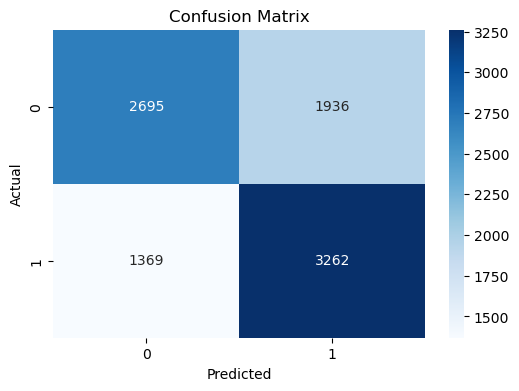

In [78]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    probs = sigmoid(logits)
    return (probs >= 0.5).astype(int)

# Predict
y_pred = predict(X, W, b)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


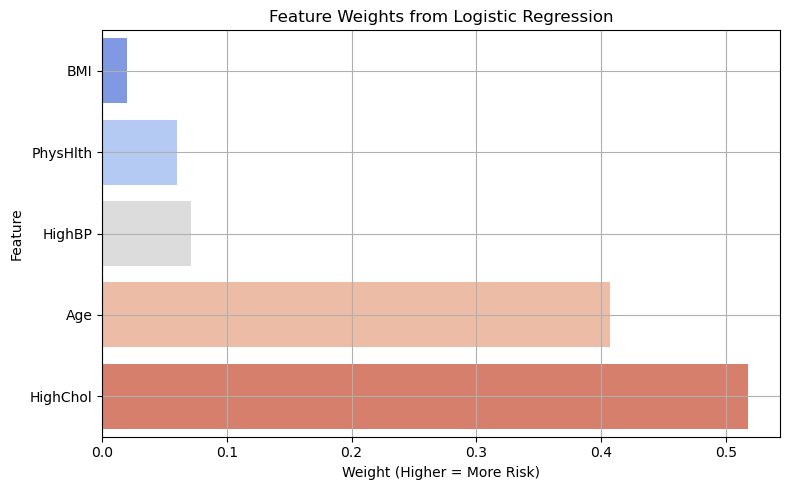

    Feature    Weight
2       BMI  0.020104
0  PhysHlth  0.060264
1    HighBP  0.071658
4       Age  0.407263
3  HighChol  0.517617


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Same features you trained on
features_to_use = ['PhysHlth', 'HighBP', 'BMI', 'HighChol', 'Age']

# Flatten W to 1D
weights = W.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': features_to_use,
    'Weight': weights
}).sort_values(by='Weight', ascending=True)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Weight', y='Feature', hue='Feature', palette='coolwarm', legend=False)
plt.title("Feature Weights from Logistic Regression")
plt.xlabel("Weight (Higher = More Risk)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.grid(True)
plt.show()

# Preview values
print(coef_df)
